In [55]:
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [56]:
path = 'Bone Break Classification'
class_list = os.listdir(path)
print(class_list)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [57]:
images, labels = [], []
img_dim = [128,128]
for (index, _class) in enumerate(class_list):
    class_path = os.path.join(path, _class)

    train_path = os.path.join(class_path, 'Train')
    for img_path in os.listdir(train_path):
        full_path = os.path.join(train_path, img_path)
        image = cv2.imread(full_path)
        # image = cv2.resize(image, (256,256))
        images.append(image)
        labels.append(index)


In [58]:
test_images, test_labels = [], []
img_dim = [128,128]
for (index, _class) in enumerate(class_list):
    class_path = os.path.join(path, _class)

    test_path = os.path.join(class_path, 'Test')
    for img_path in os.listdir(test_path):
        full_path = os.path.join(test_path, img_path)
        image = cv2.imread(full_path)
        # image = cv2.resize(image, (256,256))
        test_images.append(image)
        test_labels.append(index)

In [59]:
img = test_images[0]
# cv2.imshow("", img)
# cv2.waitKey(0)

In [60]:
sift = cv2.SIFT_create()
target_keypoint, target_descriptor = sift.detectAndCompute(img, None)
target_descriptor = np.float32(target_descriptor)

In [61]:
best_matches = 0
best_match_data = {}

In [62]:
for index, img in enumerate(images):
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayscale_img = cv2.medianBlur(grayscale_img, 3)
    grayscale_img = cv2.equalizeHist(grayscale_img)

    img_keypoint, img_descriptor = sift.detectAndCompute(grayscale_img, None)
    img_descriptor, np.float32(img_descriptor)

    # Feature Matching
    # Algoritma=1 -> KD Tree

    flann = cv2.FlannBasedMatcher(dict(algorithm=1), dict(checks=50))
    match = flann.knnMatch(target_descriptor, img_descriptor, 2)

    # [1,0] -> cocok
    # [0,0] -> tidak cocok
    matchesmask = [[0,0] for _ in range(len(match))]
    current_matches = 0

    for i, (fm, sm) in enumerate(match):
        if fm.distance < 0.7 * sm.distance:
            matchesmask[i] = [1, 0]
            current_matches += 1

    # update best match
    if best_matches < current_matches:
        best_matches = current_matches
        best_match_data = {
            "image_data": img,
            "keypoint": img_keypoint,
            "descriptor": img_descriptor,
            "match": match,
            "matchesmask": matchesmask
        }

In [ ]:
result = cv2.drawMatchesKnn(
    img,
    target_keypoint,
    best_match_data['image_data'],
    best_match_data['keypoint'],
    best_match_data['match'],
    None,
    matchesMask=best_match_data['matchesmask'],
    matchColor = [255,0,0],
    singlePointColor = [0,0,255]
)

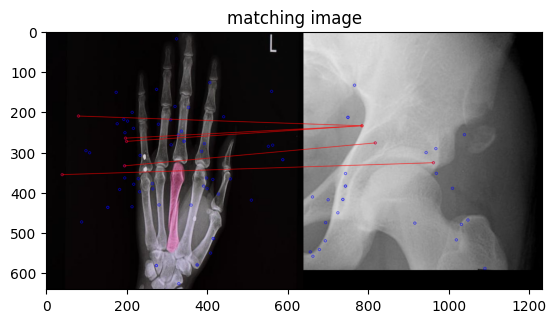

In [64]:
plt.figure(1)
plt.imshow(result)
plt.title("matching image")
plt.show()

sesat